In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_excel('Data2020_3.xlsx')
data.head()

,Unnamed: 0,A_AGE,A_HGA,A_MARITL,A_FAMREL,A_SEX,P_STAT,PECERT1,PECERT2,PECERT3,A_HRSPAY,A_HRLYWK,A_WKSTAT,CLWK,EARNER,PHMEMPRS,ERN_SRCE,CAP_VAL,WSAL_YN,FILESTAT,TAX_INC,A_CLSWKR,A_FAMREL.1,PRDTRACE,A_SEX.1,CAP_VAL.1,A_USLHRS,PRCITSHP,PTOT_R
0,0,63,39,1,1,2,1,2,-1,-1,-1,0,2,2,1,3,1,0,1,2,98944,3,1,1,2,0,40,1,22
1,1,67,39,1,2,1,1,2,-1,-1,-1,0,1,2,1,1,1,0,1,2,0,0,2,1,1,0,-1,1,30
2,2,64,39,1,1,1,1,2,-1,-1,-1,2,2,2,1,3,1,0,1,2,14589,4,1,1,1,0,48,1,18
3,3,71,36,1,2,2,1,2,-1,-1,-1,0,1,5,2,0,0,0,2,2,0,0,2,1,2,0,-1,1,9
4,4,54,39,5,0,2,1,2,-1,-1,-1,0,2,1,1,1,1,0,1,5,24720,1,0,1,2,0,44,1,17


In [ ]:
data1 = data.copy()

In [ ]:
data1['PTOT_R'] = np.where(np.logical_and(data1['PTOT_R'] >=0,data1['PTOT_R'] <17) , 1, data1['PTOT_R'])
data1['PTOT_R'] = np.where(np.logical_and(data1['PTOT_R'] >=17,data1['PTOT_R'] <26) , 2, data1['PTOT_R'])
data1['PTOT_R'] = np.where(data1['PTOT_R'] >=26, 3, data1['PTOT_R'])

In [ ]:
data1['A_AGE'] = np.where(data1['A_AGE'] < 18 , 1, data1['A_AGE'])
data1['A_AGE'] = np.where(np.logical_and(data1['A_AGE'] >= 18,data1['A_AGE']<30),2,data1['A_AGE'])
data1['A_AGE'] = np.where(np.logical_and(data1['A_AGE'] >= 30,data1['A_AGE']<50),3,data1['A_AGE'])
data1['A_AGE'] = np.where(data1['A_AGE'] >= 50,4,data1['A_AGE'])

In [ ]:
data1['A_HGA'] = np.where(data1['A_HGA'] > 0, data1['A_HGA']-30, data1['A_HGA'])

In [ ]:
data1['A_HRSPAY'] = np.where(data1['A_HRSPAY'] > 0 ,data1['A_HRSPAY']/100 , data1['A_HRSPAY'])
data1['A_HRSPAY'] = np.where(data1['A_HRSPAY'] < 0 ,0 , data1['A_HRSPAY'])

In [ ]:
data1['PECERT1'] = np.where(data1['PECERT1'] < 0 ,0 , data1['PECERT1'])
data1['PECERT2'] = np.where(data1['PECERT2'] < 0 ,0 , data1['PECERT2'])
data1['PECERT3'] = np.where(data1['PECERT3'] < 0 ,0 , data1['PECERT3'])

In [ ]:
data1['A_USLHRS'] = np.where(data1['A_USLHRS'] == -4 , 20 , data1['A_USLHRS'])
data1['A_USLHRS'] = np.where(data1['A_USLHRS'] == -1 , 0 , data1['A_USLHRS'])

In [ ]:
data1 = data1.drop('Unnamed: 0',axis=1)

In [ ]:
X = data1.loc[:, data1.columns != 'PTOT_R']
y = data1.loc[:, data1.columns == 'PTOT_R']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
columns = X_train.columns

from sklearn.feature_selection import RFE
from sklearn.naive_bayes import MultinomialNB

logreg = MultinomialNB()
rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarni

[False False False False False  True False  True  True  True  True False
 False  True  True  True False  True False False  True False False False
 False False False]
[11 14 13  3  6  1  8  1  1  1  1  9 10  1  1  1 16  1 12 18  1  2  4  5
 17 15  7]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cols = X.columns
new_cols = []
for i,j in enumerate(rfe.ranking_):
  if(j<7):
    new_cols.append(cols[i])
  else:
    print(cols[i])
X = X[new_cols]
print(X)
print(new_cols)

A_AGE
A_HGA
A_MARITL
PECERT1
A_WKSTAT
CLWK
CAP_VAL
FILESTAT
TAX_INC
CAP_VAL.1
A_USLHRS
PRCITSHP
       A_FAMREL  A_SEX  P_STAT  ...  A_FAMREL.1  PRDTRACE  A_SEX.1
0             1      2       1  ...           1         1        2
1             2      1       1  ...           2         1        1
2             1      1       1  ...           1         1        1
3             2      2       1  ...           2         1        2
4             0      2       1  ...           0         1        2
...         ...    ...     ...  ...         ...       ...      ...
79995         1      1       1  ...           1         1        1
79996         2      2       1  ...           2         1        2
79997         3      2       3  ...           3         1        2
79998         3      1       3  ...           3         1        1
79999         4      2       1  ...           4         1        2

[80000 rows x 15 columns]
['A_FAMREL', 'A_SEX', 'P_STAT', 'PECERT2', 'PECERT3', 'A_HRSPAY', 'A_HRLY

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = data1.loc[:, data1.columns != 'PTOT_R']
y = data1.loc[:, data1.columns == 'PTOT_R']

arr=[]
logreg = MultinomialNB()
X = data1.loc[:, data1.columns != 'PTOT_R']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train.values.ravel())
cols = X.columns

new_cols = []
for i,j in enumerate(rfe.ranking_):
  if(j<2):
    new_cols.append(cols[i])
X = X[new_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
knn_clf=MultinomialNB()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)
result2 = accuracy_score(y_test,ypred)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarni

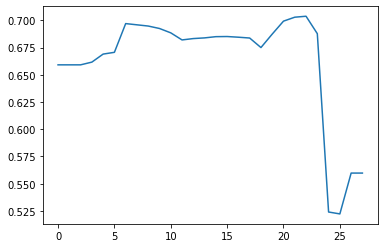

In [ ]:
plt.plot(arr)
plt.xlabel("")

In [ ]:
result2

0.679375

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[8524  347 1611]
 [ 874  163 1177]
 [ 987  134 2183]]
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.81      0.82     10482
           2       0.25      0.07      0.11      2214
           3       0.44      0.66      0.53      3304

    accuracy                           0.68     16000
   macro avg       0.50      0.52      0.49     16000
weighted avg       0.66      0.68      0.66     16000

Accuracy: 0.679375


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
cols = ['A_AGE', 'A_HGA', 'A_SEX', 'P_STAT', 'PECERT2', 'A_WKSTAT', 'EARNER', 'ERN_SRCE', 'WSAL_YN', 'A_SEX.1','PTOT_R']
data1 = data1[cols]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1)
kmeans_kwargs = {
 "init": "random", "n_init": 20,
"max_iter": 5000,
 "random_state": 0, }
sse = []
centers = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
  centers.append(kmeans.cluster_centers_)

In [ ]:
sse

[879999.999999956,
 521266.2574730932,
 384373.82085409254,
 299960.85730125976,
 257488.01871474407,
 221753.12616040703,
 202266.7023815317,
 161036.59356279887,
 158698.11328372688,
 143365.9701860658,
 128022.72819353917,
 118153.99040162248,
 112674.65634142314,
 103978.12077069405,
 102210.1423685018,
 96606.71083466086,
 92949.10775322029,
 84071.2943853669,
 80822.00897773213]

In [ ]:
centers

[array([[ 1.10139675e-15, -2.14442970e-14, -1.52192703e-15,
          1.13618531e-14, -3.73152897e-16, -7.65115124e-15,
          5.77070614e-15, -7.55824570e-15,  4.39908943e-15,
         -1.52192703e-15,  1.77280621e-15]]),
 array([[ 0.39037875,  0.45579041,  0.01649709, -0.52781319,  0.10651228,
          0.32953449,  0.42185459,  0.26925194,  0.4224911 ,  0.01649709,
          0.25695307],
        [-1.39574077, -1.6296104 , -0.05898287,  1.88711704, -0.38081873,
         -1.17820124, -1.50827792, -0.96267002, -1.51055367, -0.05898287,
         -0.91869722]]),
 array([[-1.39574077, -1.6296104 , -0.05898287,  1.88711704, -0.38081873,
         -1.17820124, -1.50827792, -0.96267002, -1.51055367, -0.05898287,
         -0.91869722],
        [ 0.45220054,  0.22026449,  0.16727791, -0.53071003, -0.25184181,
         -0.25517037,  1.36600111, -0.96267002,  1.29863547,  0.16727791,
         -0.42424183],
        [ 0.3582673 ,  0.57812719, -0.06182143, -0.52630851,  0.29264842,
          0.63